Name: Zhining Zhou

Andrew ID: zhiningz

Collaborators (if none, say "none"; do *not* leave this blank): none

Reminder: you should not be sharing code.

### Instructions
1. Fill in your name, Andrew ID, and collaborators above.
2. Fill in the code/text blocks to answer each question.
3. Do *not* change any of the existing code provided.
4. Run the entire notebook *before* submitting it on Canvas to make sure that the code actually runs without errors. (**Important**: Any code cells that you have entered code for but did not actually execute will be disregarded, so please be sure to actually run your code first and make sure it runs without errors! We may re-run a subset of your code for grading purposes.)
5. Be careful about where you save data for use with this Jupyter notebook (more details on this later).

### [Problem 1] The Distribution of Words in a Human Language: Zipf's Law [45 pts]

In this problem, you will be looking at a phenomenon of "natural languages" (i.e., human languages, such as English). As it turns out, when we look at the distribution of words in a different human languages, the distribution roughly follows what's called *Zipf's law* ([Wikipedia](https://en.wikipedia.org/wiki/Zipf%27s_law)).

*Zipf's law* states that given a large sample of words used, any word's frequency is inversely proportional to its rank in the frequency table (the word with rank 1 is the most frequently occurring word, the word with rank 2 is the second most frequently occurring word, etc). In this problem, you are going to test Zipf's law on a real dataset and explore some of its properties.

This problem assumes you have already installed the `spaCy` package ([https://spacy.io](https://spacy.io)). Instructions for installing this are part of the tutorial file "`Anaconda, Jupyter, and spaCy setup tutorial.pdf`". You can find how to access lemmatized tokens using `spaCy` by looking at the `spaCy` demo Jupyter notebook from lecture.

Note: For this problem, you don't actually need `spaCy`'s named entity recognition, grammatical parsing, or part-of-speech tagging. Turning these elements off when you instantiate the nlp object can substantially speed up your code.  To make sure these are off when instantiating the nlp object, call: 

`
nlp = spacy.load('en', disable=['ner', 'parser', 'tagger'])
`


(a) [5 pts] Read the data files.

The dataset is a collection of the 100 most popular books downloaded from Gutenburg Project ([https://www.gutenberg.org/browse/scores/top](https://www.gutenberg.org/browse/scores/top)). Each file contains the text of a book. Now read all the texts from disk. This will be the corpus in this problem.

Note: Please DO NOT change the folder name or the path, and make sure you use a relative path (e.g. './HW1_Dataset/*filename*) when reading the files. When grading your homework, we will put your Jupyter notebook file and the dataset in the same folder, and run your code. **You will receive 0 points for this problem if your code fails to load the data.**

Hint: To list all files that match a certain pattern, you can use the `glob` package. Here's an example usage:

`
import glob
print(glob.glob('./HW1_Dataset/*.txt'))
`

Hint: When debugging your code, you may want to first make sure your code runs on a few of the books rather than all 100 (for example, you can start by only having 3 of the text files in `HW1_Dataset`). Once you're confident that your solution is correct on a few text files, then run on all of them! This is a standard approach to debugging code that is meant to handle large datasets.

In [22]:
########################################################################
######################### Write your code here #########################
########################################################################
import glob
book_list = glob.glob('./HW1_Dataset/*.txt')

s = ""
for i in range(len(book_list)):
    s += open(book_list[i]).read()
len(s)

68809185

(b) [15 pts] Build the frequency table. Specifically, complete the following three tasks:

  1. Process the text by separating and lemmatizing the words.
  2. Then count the number of times each word appears in the corpus and build a frequency table. (In particular, use raw counts as the "frequency"--do not divide by the total number of words in the corpus.)
  3. Sort the table and print the top 50 most frequent words, along with their frequencies and ranks. Don't worry about ties (for example, if multiple things have the same frequency, it's fine if your solution breaks ties arbitrarily in the sorting).

Note: When counting the words, only include words (tokens) that consist of alphabetic letters (a-z and A-Z). You can do this with what's called a *regular expression*. For example, to check whether the words "will.i.am" or "Tesla" are alphabetic, you would do the following:

`
import re  # regular expression package
if re.match('[a-zA-Z]+$', 'will.i.am'):
    print('will.i.am consists only of alphabetic letters!')
if re.match('[a-zA-Z]+$', 'Tesla'):
    print('tesla consists only of alphabetic letters!')
`

In [24]:
########################################################################
######################### Write your code here #########################
########################################################################
import spacy
import re
nlp = spacy.load('en', disable=['ner', 'parser', 'tagger'])
parsed_text = []
max_size = 1000000
for i in range(69):
    if i == 68:
        parsed_text.append(nlp(s[i * max_size : len(s) + 1]))
    else:
        parsed_text.append(nlp(s[i * max_size : (i + 1) * max_size]))
parsed_text[len(parsed_text) - 1]


ous, variously
serviceable, and clever gregarious man--are in the highest degree
suitable to give rise to exceptional men of the most dangerous and
attractive qualities. For, while the capacity for adaptation, which is
every day trying changing conditions, and begins a new work with every
generation, almost with every decade, makes the POWERFULNESS of the type
impossible; while the collective impression of such future Europeans
will probably be that of numerous, talkative, weak-willed, and very
handy workmen who REQUIRE a master, a commander, as they require their
daily bread; while, therefore, the democratising of Europe will tend to
the production of a type prepared for SLAVERY in the most subtle
sense of the term: the STRONG man will necessarily in individual and
exceptional cases, become stronger and richer than he has perhaps ever
been before--owing to the unprejudicedness of his schooling, owing to
the immense variety of practice, art, and disguise. I meant to say
that the democr

In [42]:
from collections import Counter

histogram_with_some_filtering = Counter()

for parsed_text_i in parsed_text:
    for token in parsed_text_i:
        lemma = token.lemma_.lower()
        if not (nlp.vocab[lemma].is_stop or token.pos_ == 'PUNCT' or token.pos_ == 'SPACE'):
            if re.match('[a-zA-Z]+$', lemma):
                histogram_with_some_filtering[lemma] += 1
    
from operator import itemgetter
sorted_lemma_count_pairs = sorted(histogram_with_some_filtering.items(),
                                  reverse=True,
                                  key=itemgetter(1))

In [43]:
j = 1
for i in range(len(sorted_lemma_count_pairs)):
    sorted_lemma_count_pairs[i] = sorted_lemma_count_pairs[i] + (j,)
    j += 1
sorted_lemma_count_pairs[0]

('man', 39882, 1)

In [44]:
for lemma, count, rank in sorted_lemma_count_pairs[0:50]:
    print(lemma, ":", count, "Rank", ":", rank)

man : 39882 Rank : 1
come : 32506 Rank : 2
good : 29365 Rank : 3
shall : 25993 Rank : 4
know : 25516 Rank : 5
time : 22044 Rank : 6
little : 20907 Rank : 7
think : 20900 Rank : 8
like : 18618 Rank : 9
day : 18051 Rank : 10
look : 17218 Rank : 11
hand : 16992 Rank : 12
great : 16916 Rank : 13
thing : 15702 Rank : 14
thou : 15385 Rank : 15
work : 14604 Rank : 16
lord : 14363 Rank : 17
tell : 14178 Rank : 18
find : 13552 Rank : 19
long : 13549 Rank : 20
god : 13245 Rank : 21
let : 12816 Rank : 22
thy : 12523 Rank : 23
old : 12440 Rank : 24
way : 12407 Rank : 25
hear : 12290 Rank : 26
leave : 12231 Rank : 27
eye : 11554 Rank : 28
place : 11304 Rank : 29
house : 11104 Rank : 30
speak : 11016 Rank : 31
life : 10694 Rank : 32
love : 10678 Rank : 33
word : 10447 Rank : 34
unto : 10418 Rank : 35
king : 10379 Rank : 36
people : 10282 Rank : 37
away : 9998 Rank : 38
feel : 9709 Rank : 39
project : 9183 Rank : 40
stand : 9173 Rank : 41
father : 9151 Rank : 42
head : 9016 Rank : 43
woman : 8989 Ran

(c) [10 pts] Visualize the frequency table by plotting a **raw scatter plot** (put frequency as the y-axis and rank as the x-axis), and a **log-log plot** (use logarithmic scales on both the x- and y- axes). Note that this should be for all words and not only the top 50. As before, for the ranks, do not worry about ties, i.e., break ties arbitrarily.

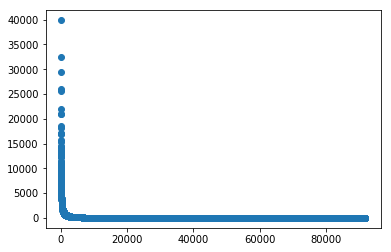

In [52]:
# Raw scatter plot
########################################################################
######################### Write your code here #########################
########################################################################
%matplotlib inline
import matplotlib.pyplot as plt
x = []
y = []
for lemma, count, rank in sorted_lemma_count_pairs:
    x.append(rank)
    y.append(count)
plt.scatter(x, y);

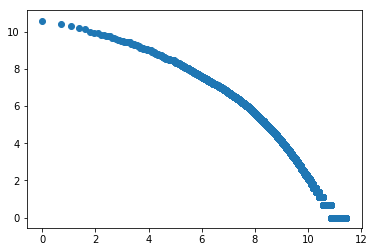

In [51]:
# Log-log plot
########################################################################
######################### Write your code here #########################
########################################################################
import math
x = []
y = []
for lemma, count, rank in sorted_lemma_count_pairs:
    x.append(math.log(rank))
    y.append(math.log(count))
plt.scatter(x, y)

(d) [15 pts] Explore the frequency table: Zipf's law states that term frequency is governed by a power low, i.e. the relationship between term frequency and rank can be approximated by $f(r) = cr^{-1}$, where $f(r)$ is the frequency of the term at rank $r$, $r$ is the rank of a term, and $c$ is a constant and is approximately 0.1*(corpus size) for English. 

Answer following questions:

- What do you observe in the log-log plot above? Is this consist with the power law?

Your text answer (for this question, your answer is *not* code): *** WRITE YOUR ANSWER HERE ***

- Think of the corpus as a (large) unigram bag of words. Following the analogy from lecture, imagine drawing a single word from this big bag (note that we are assuming that we've lemmatized the words and also filtered out non-alphanumeric words). What is the probability of drawing one of the 4 most frequent words? What is the probability of drawing one of the 50 most frequent words? Answer these two questions using code rather than just entering in the final answers as numbers.

In [ ]:
print('Probability of drawing one of the 4 most frequent words: ')
########################################################################
######################### Write your code here #########################
########################################################################
print('Probability of drawing one of the 50 most frequent words: ')
########################################################################
######################### Write your code here #########################
########################################################################

- What proportion of the words occur only once? What proportion of the words occur fewer than 10 times?

In [ ]:
print("Occur only once: ")
########################################################################
######################### Write your code here #########################
########################################################################
print("Occur fewer than 10 times: ")
########################################################################
######################### Write your code here #########################
########################################################################

### [Problem 2] Entity Recognition and Pointwise Mutual Information (PMI) [50 pts]
By using the entity recognition system in `spaCy`, let's identify named entities from newspaper articles. You'll be using Reuters corpus which contains more than ten thousand newspaper articles. To run the code below, you need to download the Reuters dataset. To do so, in a terminal/command line (recall that you can open a terminal from Jupyter's webpage that shows all the files, which by default is [http://localhost:8888/tree](http://localhost:8888/tree)), start up Python and enter:

`
import nltk
nltk.download('reuters')
`

Then proceed to the problem subparts below.

Note that in this problem you will need named entity recognition but not grammatical parsing or the part-of-speech tagging. Hence, you will want to instantiate the nlp object by calling:

`
nlp = spacy.load('en', disable=['parser', 'tagger'])
`


(a) [15 pts] Draw a bar chart in which one of the axes shows entity labels and the other shows the frequency of the corresponding label. Use the variables `reuters_nlp` and `label_counter` provided in the code below.

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import reuters
import re
import spacy
nlp = spacy.load('en', disable=['parser', 'tagger'])
reuters_fileids = reuters.fileids()  # hint: when first debugging, consider looking at just the first few
reuters_nlp = [nlp(re.sub('\s+',' ', reuters.raw(i)).strip()) for i in reuters_fileids]
label_counter = Counter()
########################################################################
######################### Write your code here #########################
########################################################################

(b) [15 pts] Now list the top 10 most frequently occured entities (entity text and the number of occurence) with labels `ORG` (organization) and `GPE` (countries, cities, states) respectively.

Hint: Here, when counting the frequency, we need to count how many articles have an entity with the desired property. For every article, we add 1 if the article has the entity and 0 otherwise.  List filtering (as in Recitation 1) will be helpful here.

In [ ]:
########################################################################
######################### Write your code here #########################
########################################################################

(c) [20 pts] Give the top 50 `GPE` (countries, cities, states) entities that have the highest Pointwise Mutual Information (PMI) values with regard to the `ORG` (organization) entity **'opec'** (your list of this top 50 should be ranked in decreasing PMI value). Did you find any unexpected results? If so, why do you think it happened? If you found some of the results to be unsurprisingly, how come? 

Hint 1: As in lecture, when computing PMI, we will compute probabilities by counting the number of documents where entities occur or co-occur.  For example, $P('opec') = \frac{number \ \ of \ \ documents \ \ containing \ \ 'opec'}{number \ \ of \ \ documents}$.  

Hint 2: To compute this ranking, you do not have to compute the full PMI equation.

In [ ]:
########################################################################
######################### Write your code here #########################
########################################################################

Your text answer (for this question, your answer is *not* code): *** WRITE YOUR ANSWER HERE ***

### [Problem 3] Questionnaire [5 pts]
Please provide feedback! To receive the 5 points, be sure to enter your Andrew ID correctly in this Google form: https://goo.gl/forms/tGmCD8L9uI8zNbRG3